In [112]:
# Import the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Algorithms import cm2in
from Algorithms import TUBScolorscale

# Plot width and heigth in cm
plot_width = 19.
plot_height = 7.5
# Define data folder
data_folder = "./Data/FOTDS/1/"
# Define the export folder
export_folder = "../Latex/Graphics/Physical_"

In [113]:
# Open the data file
# Column names
temp_range = range(273,314,5)
column_names = ["{:03d}".format(x) for x in temp_range]+['Qdot', 'Inertia Fan', 'Inertia Valve', 'Gascooler', 'Zeta']

# Read the Data from Fan to Temperature
Fan_Temp_K = pd.read_csv(data_folder+'Fan_Temperature_K.csv', sep='  ', header = None, names = column_names)
Fan_Temp_T = pd.read_csv(data_folder+'Fan_Temperature_T.csv', sep='  ', header = None, names = column_names)
Fan_Temp_L = pd.read_csv(data_folder+'Fan_Temperature_L.csv', sep='  ', header = None, names = column_names)

# Sort for Gain -> Temp, Lag -> Temp, Delay -> Temp, Parameter -> All other stuff
dict= {'Gain': Fan_Temp_K[column_names[:-5]],
         'Lag':Fan_Temp_T[column_names[:-5]],
         'Delay':Fan_Temp_L[column_names[:-5]],
         'Parameter': Fan_Temp_K[column_names[-5:]]}
# Concat
Fan_Temp = pd.concat(dict.values(),axis=1,keys=dict.keys())

# Read the Data from Fan to Pressure
Fan_Pressure_K = pd.read_csv(data_folder+'Fan_Pressure_K.csv', sep='  ', header = None, names = column_names)
Fan_Pressure_T = pd.read_csv(data_folder+'Fan_Pressure_T.csv', sep='  ', header = None, names = column_names)
Fan_Pressure_L = pd.read_csv(data_folder+'Fan_Pressure_L.csv', sep='  ', header = None, names = column_names)
# Give the Columns
dict = {'Gain': Fan_Pressure_K[column_names[:-5]],
        'Lag':Fan_Pressure_T[column_names[:-5]],
        'Delay':Fan_Pressure_L[column_names[:-5]],
        'Parameter': Fan_Temp_K[column_names[-5:]]}
# Concat
Fan_Pressure = pd.concat(dict.values(),axis=1,keys=dict.keys())

# Read the Data from Valve to Temperature
Val_Temp_K = pd.read_csv(data_folder+'Valve_Temperature_K.csv', sep='  ', header = None, names = column_names)
Val_Temp_T = pd.read_csv(data_folder+'Valve_Temperature_T.csv', sep='  ', header = None, names = column_names)
Val_Temp_L = pd.read_csv(data_folder+'Valve_Temperature_L.csv', sep='  ', header = None, names = column_names)
# Give the Columns
dict = {'Gain': Val_Temp_K[column_names[:-5]],
        'Lag':Val_Temp_T[column_names[:-5]],
        'Delay':Val_Temp_L[column_names[:-5]],
        'Parameter': Val_Temp_K[column_names[-5:]]}
Valve_Temp = pd.concat(dict.values(),axis=1,keys=dict.keys())

# Read the Data from Valve to Pressure
Val_Pres_K = pd.read_csv(data_folder+'Valve_Pressure_K.csv', sep='  ', header = None, names = column_names)
Val_Pres_T = pd.read_csv(data_folder+'Valve_Pressure_T.csv', sep='  ', header = None, names = column_names)
Val_Pres_L = pd.read_csv(data_folder+'Valve_Pressure_L.csv', sep='  ', header = None, names = column_names)
# Give the Columns
dict = {'Gain': Val_Pres_K[column_names[:-5]],
        'Lag':Val_Pres_T[column_names[:-5]],
        'Delay':Val_Pres_L[column_names[:-5]],
        'Parameter': Val_Pres_K[column_names[-5:]]}
Valve_Pressure = pd.concat(dict.values(),axis=1,keys=dict.keys())

C:\Users\juliu\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
C:\Users\juliu\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\juliu\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\U

37


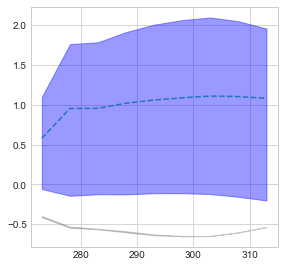

In [114]:
# Diagonal Dominance -> Steady State
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a plot
plt.clf()
fig, ax = plt.subplots(1, figsize=cm2in(1.5*plot_height, 1.5*plot_height))

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
print(length)
dom_max = []
dom_min = []
det_max = []
det_min = []
x = []
# Preallocation
for temps in temp_range:
    main_min = 1e10
    main_max = -1e10
    minor_min = 1e10
    minor_max = -1e10
    for scenario in range(0,length):
        # Main Diagonal Gains
        main = (Fan_Temp['Gain', str(temps)][scenario])*(Valve_Pressure['Gain', str(temps)][scenario])
        # Check the values
        if main > main_max:
            main_max = main
        if main < main_min:
            main_min = main
        # Minor Diagonal
        minor = (Fan_Pressure['Gain', str(temps)][scenario])*(Valve_Temp['Gain', str(temps)][scenario])
        if minor > minor_max:
            minor_max = minor
        if minor < minor_min:
            minor_min = minor
    # Static Limits of maximum Error        
    dom_max.append(-1/np.abs(main_max/minor_min))
    dom_min.append(-1/np.abs(main_min/minor_max))
    # Static Limits of the determinant
    det_max.append(np.abs((main_max-minor_min)/main_min)-1)
    det_min.append(np.abs((main_min-minor_max)/main_max)-1)
    x.append(temps)

ax.fill_between(x,dom_max,dom_min, color = 'grey', alpha = 0.4)
ax.fill_between(x,det_min,det_max, color = 'blue', alpha = 0.4)
ax.plot(x,(np.array(det_max)-np.array(det_min))/2, linestyle = 'dashed')
#ax.scatter(x,dom_min, color = TUBScolorscale[9])

plt.grid(True)
plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.4,0.1))
plt.show()

38


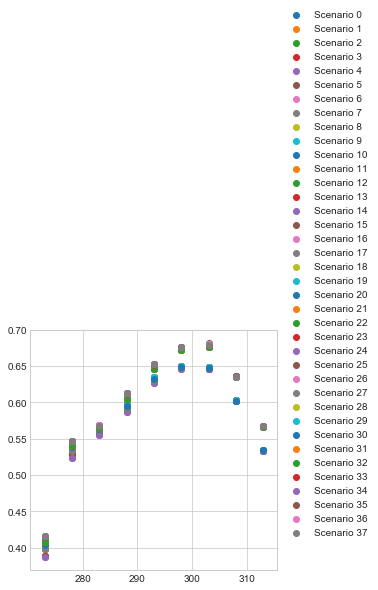

In [96]:
# Diagonal Dominance -> Steady State
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a plot
plt.clf()
fig, ax = plt.subplots(1, figsize=cm2in(1.5*plot_height, 1.5*plot_height))

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
print(length)
# Preallocation
for scenario in range(0,length):
    x = []
    dom1, dom2 = [], []
    for temps in temp_range:
        # Minor Diagonal
        #main = (Fan_Temp['Lag', str(temps)][scenario]+Fan_Temp['Delay', str(temps)][scenario])*(Valve_Pressure['Lag', str(temps)][scenario]+Valve_Pressure['Delay', str(temps)][scenario])
        main = (Fan_Temp['Gain', str(temps)][scenario])*(Valve_Pressure['Gain', str(temps)][scenario])
        #minor = (Fan_Pressure['Lag', str(temps)][scenario]+Fan_Pressure['Delay', str(temps)][scenario])*(Valve_Temp['Lag', str(temps)][scenario]+Valve_Temp['Delay', str(temps)][scenario])
        minor = (Fan_Pressure['Gain', str(temps)][scenario])*(Valve_Temp['Gain', str(temps)][scenario])
        dom1.append(-1*(minor/main))
        x.append(temps)
    ax.scatter(x,dom1, label = 'Scenario '+str(scenario))

plt.grid(True)
plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.4,0.1))
plt.show()

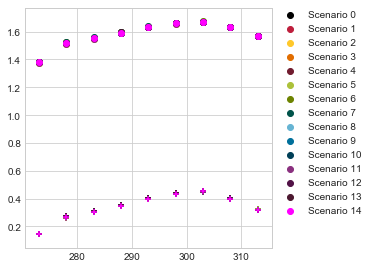

In [82]:
# Diagonal Dominance -> Steady State
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a plot
plt.clf()
fig, ax = plt.subplots(1, figsize=cm2in(1.5*plot_height, 1.5*plot_height))

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
# Preallocation
for scenario in range(0,length):
    x = []
    dom1, dom2 = [], []
    for temps in temp_range:
        # Minor Diagonal
        #main = (Fan_Temp['Lag', str(temps)][scenario]+Fan_Temp['Delay', str(temps)][scenario])*(Valve_Pressure['Lag', str(temps)][scenario]+Valve_Pressure['Delay', str(temps)][scenario])
        main = (Fan_Temp['Gain', str(temps)][scenario])*(Valve_Pressure['Gain', str(temps)][scenario])
        #minor = (Fan_Pressure['Lag', str(temps)][scenario]+Fan_Pressure['Delay', str(temps)][scenario])*(Valve_Temp['Lag', str(temps)][scenario]+Valve_Temp['Delay', str(temps)][scenario])
        minor = (Fan_Pressure['Gain', str(temps)][scenario])*(Valve_Temp['Gain', str(temps)][scenario])
        dom1.append(np.abs((main-minor)/main))
        dom2.append(np.abs((minor/main)**2))
        x.append(temps)
    ax.scatter(x,dom1, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax.scatter(x,np.array(dom2),color = TUBScolorscale[scenario],marker = '+')

plt.grid(True)
plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.4,0.1))
plt.show()

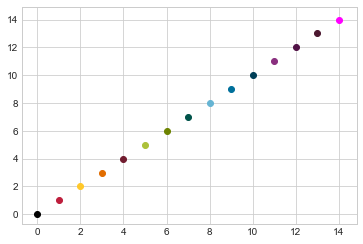

In [4]:
plt.clf()
fig, ax = plt.subplots(1)
for i in range(0,len(TUBScolorscale)):
    ax.scatter(i,i, color=TUBScolorscale[i])
plt.show()

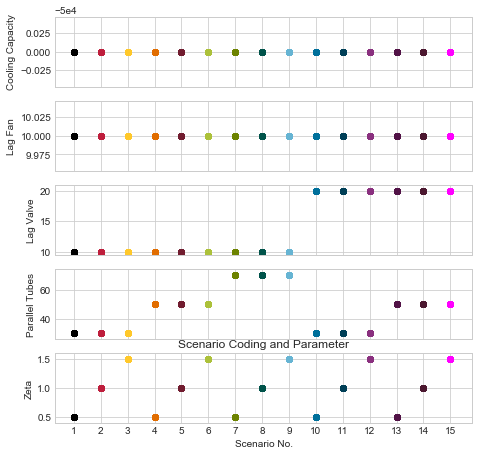

In [13]:
# Diagonal Dominance -> Steady State
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a plot
plt.clf()
fig, ax = plt.subplots(5, figsize=cm2in(plot_width,plot_width), sharex = True)

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
# Preallocation
for scenario in range(0,length):
    x = []
    #'Qdot', 'Inertia Fan', 'Inertia Valve', 'Gascooler', 'Zeta'
    q, tf, tv, gc,z = [],[],[],[],[]
    for temps in temp_range:
        # Minor Diagonal
        #main = (Fan_Temp['Lag', str(temps)][scenario]+Fan_Temp['Delay', str(temps)][scenario])*(Valve_Pressure['Lag', str(temps)][scenario]+Valve_Pressure['Delay', str(temps)][scenario])
        q.append(Valve_Pressure['Parameter','Qdot'][scenario])
        tf.append(Valve_Pressure['Parameter','Inertia Fan'][scenario])
        tv.append(Valve_Pressure['Parameter','Inertia Valve'][scenario])
        gc.append(Valve_Pressure['Parameter','Gascooler'][scenario])
        z.append(Valve_Pressure['Parameter','Zeta'][scenario])
        x.append(scenario+1)
    ax[0].scatter(x,q,color = TUBScolorscale[scenario])
    ax[1].scatter(x,tf,color = TUBScolorscale[scenario])
    ax[2].scatter(x,tv,color = TUBScolorscale[scenario])
    ax[3].scatter(x,gc,color = TUBScolorscale[scenario])
    ax[4].scatter(x,z,color = TUBScolorscale[scenario])


plt.grid(True)
plt.title('Scenario Coding and Parameter')
ax[0].set_ylabel('Cooling Capacity')
ax[1].set_ylabel('Lag Fan')
ax[2].set_ylabel('Lag Valve')
ax[3].set_ylabel('Parallel Tubes')
ax[4].set_ylabel('Zeta')
ax[4].set_xlabel('Scenario No.')
plt.xticks(np.arange(1, length+1, 1.0))
#plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.4,0.1))
plt.show()

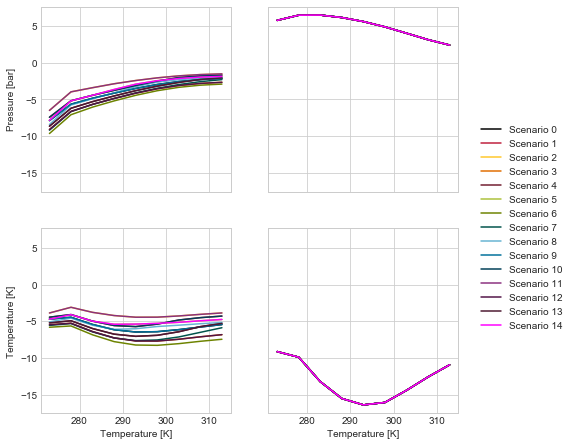

In [8]:
# Diagonal Dominance -> Steady State
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a plot
plt.clf()
fig, ax = plt.subplots(2,2, figsize=cm2in(plot_width,plot_width), sharex = True, sharey = True)

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
# Preallocation
for scenario in range(0,length):
    x = []
    ft, vp, fp, vt = [],[],[],[]
    for temps in temp_range:
        # Minor Diagonal
        #main = (Fan_Temp['Lag', str(temps)][scenario]+Fan_Temp['Delay', str(temps)][scenario])*(Valve_Pressure['Lag', str(temps)][scenario]+Valve_Pressure['Delay', str(temps)][scenario])
        ft.append(Fan_Temp['Gain', str(temps)][scenario])
        vp.append(Valve_Pressure['Gain', str(temps)][scenario])
        fp.append( Fan_Pressure['Gain', str(temps)][scenario])
        vt.append(Valve_Temp['Gain', str(temps)][scenario])
        
        x.append(temps)
    ax[0,0].plot(x,ft,color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[0,1].plot(x,vt, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[1,0].plot(x,fp, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[1,1].plot(x,vp, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))

plt.grid(True)
ax[1,0].set_xlabel('Temperature [K]')
ax[1,1].set_xlabel('Temperature [K]')
ax[1,0].set_ylabel('Temperature [K]')
ax[0,0].set_ylabel('Pressure [bar]')
plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.6,0.4))
plt.show()

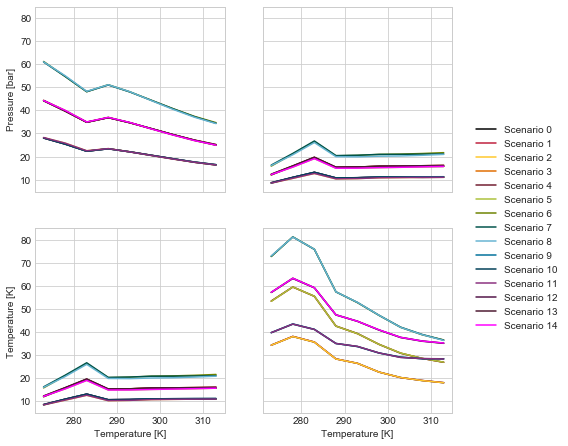

In [10]:
# Diagonal Dominance -> Steady State
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a plot
plt.clf()
fig, ax = plt.subplots(2,2, figsize=cm2in(plot_width,plot_width), sharex = True, sharey = True)

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
# Preallocation
for scenario in range(0,length):
    x = []
    ft, vp, fp, vt = [],[],[],[]
    for temps in temp_range:
        # Minor Diagonal
        #main = (Fan_Temp['Lag', str(temps)][scenario]+Fan_Temp['Delay', str(temps)][scenario])*(Valve_Pressure['Lag', str(temps)][scenario]+Valve_Pressure['Delay', str(temps)][scenario])
        ft.append(Fan_Temp['Lag', str(temps)][scenario])
        vp.append(Valve_Pressure['Lag', str(temps)][scenario])
        fp.append( Fan_Pressure['Lag', str(temps)][scenario])
        vt.append(Valve_Temp['Lag', str(temps)][scenario])
        
        x.append(temps)
    ax[0,0].plot(x,ft, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[0,1].plot(x,vt, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[1,0].plot(x,fp, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[1,1].plot(x,vp, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))

plt.grid(True)
ax[1,0].set_xlabel('Temperature [K]')
ax[1,1].set_xlabel('Temperature [K]')
ax[1,0].set_ylabel('Temperature [K]')
ax[0,0].set_ylabel('Pressure [bar]')
plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.6,0.4))
plt.show()

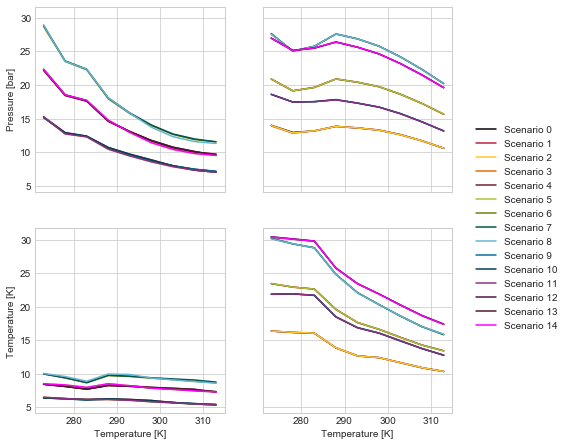

In [12]:
# Diagonal Dominance -> Steady State
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a plot
plt.clf()
fig, ax = plt.subplots(2,2, figsize=cm2in(plot_width,plot_width), sharex = True, sharey = True)

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
# Preallocation
for scenario in range(0,length):
    x = []
    ft, vp, fp, vt = [],[],[],[]
    for temps in temp_range:
        # Minor Diagonal
        #main = (Fan_Temp['Lag', str(temps)][scenario]+Fan_Temp['Delay', str(temps)][scenario])*(Valve_Pressure['Lag', str(temps)][scenario]+Valve_Pressure['Delay', str(temps)][scenario])
        ft.append(Fan_Temp['Delay', str(temps)][scenario])
        vp.append(Valve_Pressure['Delay', str(temps)][scenario])
        fp.append( Fan_Pressure['Delay', str(temps)][scenario])
        vt.append(Valve_Temp['Delay', str(temps)][scenario])
        
        x.append(temps)
    ax[0,0].plot(x,ft, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[0,1].plot(x,vt, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[1,0].plot(x,fp, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))
    ax[1,1].plot(x,vp, color = TUBScolorscale[scenario], label = 'Scenario '+str(scenario))

plt.grid(True)
ax[1,0].set_xlabel('Temperature [K]')
ax[1,1].set_xlabel('Temperature [K]')
ax[1,0].set_ylabel('Temperature [K]')
ax[0,0].set_ylabel('Pressure [bar]')
plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.6,0.4))
plt.show()

In [ ]:
# Diagonal Dominance -> Steady State
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

# Make a plot
plt.clf()
fig, ax = plt.subplots(2,2, figsize=cm2in(plot_width,plot_width), sharex = True, sharey = True)

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
# Preallocation
for scenario in range(0,length):
    x = []
    ft, vp, fp, vt = [],[],[],[]
    for temps in temp_range:
        # Minor Diagonal
        #main = (Fan_Temp['Lag', str(temps)][scenario]+Fan_Temp['Delay', str(temps)][scenario])*(Valve_Pressure['Lag', str(temps)][scenario]+Valve_Pressure['Delay', str(temps)][scenario])
        ft.append(Fan_Temp['Delay', str(temps)][scenario])
        vp.append(Valve_Pressure['Delay', str(temps)][scenario])
        fp.append( Fan_Pressure['Delay', str(temps)][scenario])
        vt.append(Valve_Temp['Delay', str(temps)][scenario])
        
        x.append(temps)
    ax[0,0].plot(x,ft)
    ax[0,1].plot(x,vt)
    ax[1,0].plot(x,fp)
    ax[1,1].plot(x,vp)

plt.grid(True)
ax[1,0].set_xlabel('Temperature [K]')
ax[1,1].set_xlabel('Temperature [K]')
ax[1,0].set_ylabel('Temperature [K]')
ax[0,0].set_ylabel('Pressure [bar]')
plt.legend(loc="lower right", ncol=1,  bbox_to_anchor=(1.4,0.1))
plt.show()

In [52]:
# Gain 3d Plot
# Make a plot
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
# Make a plot
plt.clf()
fig = plt.figure(figsize=cm2in(plot_width,plot_width), )
ax = fig.add_subplot(111,projection = '3d')

# Data Sorting for Parameter Values
length = Fan_Temp.shape[0]
# Preallocation
for scenario in range(0,length):
    x,y,z = [],[],[]
    # Calculate the mean for gain
    gain = []
    for temps in temp_range:
        # Minor Diagonal
        #main = (Fan_Temp['Lag', str(temps)][scenario]+Fan_Temp['Delay', str(temps)][scenario])*(Valve_Pressure['Lag', str(temps)][scenario]+Valve_Pressure['Delay', str(temps)][scenario])
        gain.append(Fan_Temp['Gain', str(temps)][scenario])
        #vp.append(Valve_Pressure['Delay', str(temps)][scenario])
        #fp.append( Fan_Pressure['Delay', str(temps)][scenario])
        #vt.append(Valve_Temp['Delay', str(temps)][scenario])
        
    x = Fan_Temp['Parameter','Inertia Valve'][scenario]
    y = Fan_Temp['Parameter','Gascooler'][scenario]
    z = Fan_Temp['Parameter','Zeta'][scenario]
    ax.plot(x,y,z,s = 50*np.abs(np.mean(gain)), color = TUBScolorscale[scenario])
    #ax.scatter(0,y,z, s = 50, color = TUBScolorscale[scenario],marker ='+')
    #ax.scatter(x,80,z, s = 50, color = TUBScolorscale[scenario],marker ='+')
    #ax.scatter(x,y,0, s = 50, color = TUBScolorscale[scenario],marker ='+')
    ax.scatter(x,y,z, s = 50*(np.abs(np.mean(gain))+np.abs(np.var(gain))),alpha = 0.3, color = TUBScolorscale[scenario])

plt.grid(True)
plt.show()

TypeError: object of type 'numpy.int64' has no len()

In [72]:
from pandas.tools.plotting import parallel_coordinates

#data = pandas.read_csv(r'C:\Python27\Lib\site-packages\pandas\tests\data\iris.csv', sep=',')
Fan_Pressure['Gain'].columns

pd.tools.plotting.parallel_coordinates(
    Fan_Pressure['Gain'], 
    Fan_Pressure['Gain'].columns)
plt.show()

C:\Users\juliu\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices